# Titanic ML competition - EDA

## Imports

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as stats

## Train data

### TODO 
* Divide/transform data -> survived/not survived - OK;
* Anlyze each variable for survivers/not -> values, estimates and distributions - OK; 
* Change boxplot of Tickets to barplot -> Survivors/Not survivors; 
* Test relationships and hypotesis for fare and tickets x survived
* Train a model based on EDA, relationships and hypotesis

In [2]:
train_data = pd.read_csv('../datasets/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data['SurvivedStr'] = train_data['Survived'].replace({0: "No", 1: "Yes"})
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedStr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No


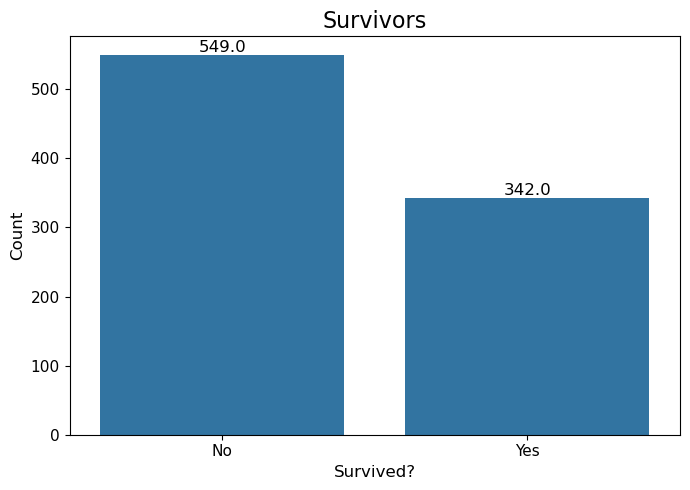

In [6]:
plt.figure(figsize=(7,5))
graph = sns.countplot(data=train_data, x='SurvivedStr')
plt.title('Survivors', fontsize=16)
plt.xlabel('Survived?', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Count', fontsize=12)
for p in graph.patches: #bars
    graph.annotate( #add text
        f'{p.get_height()}', #bar height = value
        (p.get_x() + p.get_width() / 2., p.get_height()), #value position
        ha='center', va='bottom', #align
        fontsize=12
    )
plt.tight_layout()
plt.show()

In [7]:
survived = train_data.query('Survived==1')
not_survived = train_data.query('Survived==0')
num_data = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [8]:
survived[num_data].describe()

,Pclass,Age,SibSp,Parch,Fare
count,342.000000,290.000000,342.000000,342.000000,342.000000
mean,1.950292,28.343690,0.473684,0.464912,48.395408
std,0.863321,14.950952,0.708688,0.771712,66.596998
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,19.000000,0.000000,0.000000,12.475000
50%,2.000000,28.000000,0.000000,0.000000,26.000000
75%,3.000000,36.000000,1.000000,1.000000,57.000000
max,3.000000,80.000000,4.000000,5.000000,512.329200


In [9]:
not_survived[num_data].describe()

,Pclass,Age,SibSp,Parch,Fare
count,549.000000,424.000000,549.000000,549.000000,549.000000
mean,2.531876,30.626179,0.553734,0.329690,22.117887
std,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,39.000000,1.000000,0.000000,26.000000
max,3.000000,74.000000,8.000000,6.000000,263.000000


## Insight 1

The mean, maximum value and median of Pclass and Fare in the survivor table are higher than in the non-survivor table. <br>
This shows us that the social class of passengers can have a great influence on their survival. <br>
The remaing variables do not show considerable variations between the two tables.

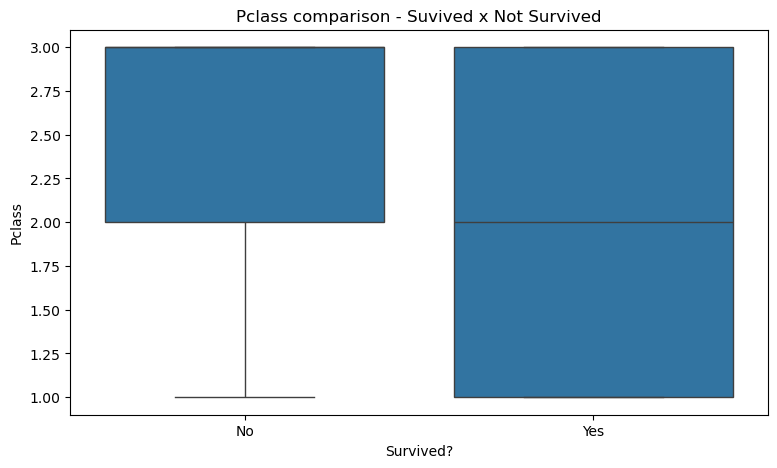

In [24]:
plt.figure(figsize=(9,5))
sns.boxplot(x='SurvivedStr', y='Pclass', data=train_data)
plt.title('Pclass comparison - Suvived x Not Survived')
plt.xlabel('Survived?')
plt.ylabel('Pclass')
plt.show()

In [26]:
train_data['FareLog2'] = np.log2(train_data['Fare'])
train_data.head()

C:\Users\Giordano\anaconda3\envs\titanic-machine-learning-env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedStr,PclassNormalized,FareLog2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,1.584963,2.857981
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,0.000000,6.155492
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes,1.584963,2.986411
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,0.000000,5.730640
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,1.584963,3.008989


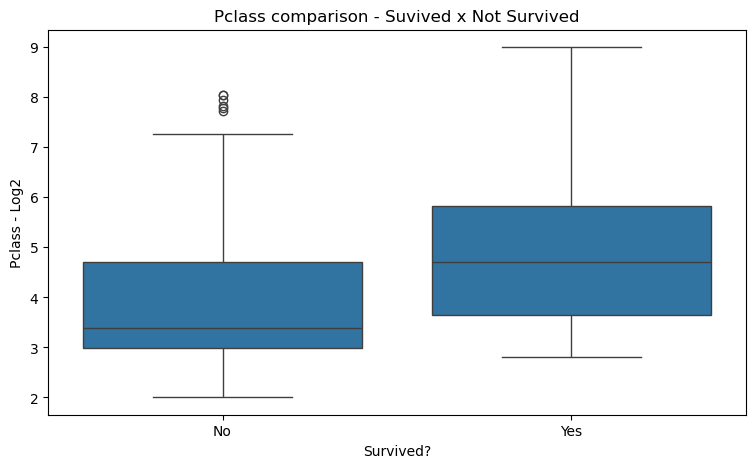

In [28]:
plt.figure(figsize=(9,5))
sns.boxplot(x='SurvivedStr', y='FareLog2', data=train_data)
plt.title('Pclass comparison - Suvived x Not Survived')
plt.xlabel('Survived?')
plt.ylabel('Pclass - Log2')
plt.show()